**Janhavi Shinde**

**Roll No - DS24MS14**

**AirLine Classification**

IndiGo, a leading airline in India, wants to improve customer experience and build strong loyalty. One important goal is to find out which passengers
are likely to recommend the airline to others.To do this, IndiGo is using passenger reviews from 2006 to 2019, which include opinions on things like 
comfort, service, and overall value. These reviews help IndiGo understand what customers like or dislike about their travel experience.Using this data, 
IndiGo plans to create a model that can predict whether a passenger will recommend the airline, based on their review and travel experience.

**Importing Packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("updated_Airline_data.csv")

In [4]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [6]:
df.shape

(14215, 19)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [8]:
df.isnull().sum()

Unnamed: 0            0
airline               0
overall               0
author                0
review_date           0
customer_review       0
aircraft              0
traveller_type        0
cabin                 0
date_flown            0
seat_comfort          0
cabin_service         0
food_bev              0
entertainment         0
ground_service        0
value_for_money       0
recommended           0
sentiment             0
aircraft_brands    5706
dtype: int64

**Dropping the aircraft_brands column as it contains null values**

In [9]:
df.drop('aircraft_brands', axis = 1, inplace = True)

In [10]:
df.isnull().sum()

Unnamed: 0         0
airline            0
overall            0
author             0
review_date        0
customer_review    0
aircraft           0
traveller_type     0
cabin              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
sentiment          0
dtype: int64

In [11]:
df.duplicated().sum()

0

**Dropping the columns that do not contribute to the dependent variable**

In [12]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [13]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


In [14]:
df.drop('author', axis=1,inplace=True)

In [15]:
df.drop('customer_review', axis=1,inplace=True)

In [16]:
for i in df.columns:
    print(i,"\n",df[i].unique(),"\n")

airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airway

In [17]:
df.drop('airline', axis=1,inplace=True)

In [18]:
df.drop('aircraft', axis=1,inplace=True)

In [19]:
df.head()

,overall,review_date,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,10.0,6th May 2019,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,2.0,29th April 2019,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,6.0,29th April 2019,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,1.0,28th April 2019,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,2.0,24th April 2019,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


In [20]:
df.shape

(14215, 13)

In [21]:
df.drop('review_date', axis=1,inplace=True)

In [22]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,10.0,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,2.0,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,6.0,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,1.0,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,2.0,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


**Changing the data types**

In [23]:
df['seat_comfort'] = df['seat_comfort'].astype(int)
df['cabin_service'] = df['cabin_service'].astype(int)
df['food_bev'] = df['food_bev'].astype(int)
df['entertainment'] = df['entertainment'].astype(int)
df['ground_service'] = df['ground_service'].astype(int)
df['value_for_money'] = df['value_for_money'].astype(int)
df['overall'] = df['overall'].astype(int)

In [24]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,10,Solo Leisure,Economy Class,April 2019,4,5,5,5,5,5,yes,positive
1,2,Solo Leisure,Economy Class,April 2019,3,3,2,3,1,2,no,positive
2,6,Solo Leisure,Economy Class,April 2019,2,3,3,3,3,3,yes,positive
3,1,Solo Leisure,Economy Class,February 2019,1,1,1,1,1,1,no,negative
4,2,Solo Leisure,Economy Class,March 2019,1,3,2,2,1,1,no,positive


**Changing the data type and extracting month and year**

In [25]:
def convert_mixed_dates(date_str):
    try:
        return pd.to_datetime(date_str, format='%b-%y')
    except:
        try:
            return pd.to_datetime(date_str, format='%B %Y')
        except:
            return pd.NaT

# Apply the function to the column
df['date_flown'] = df['date_flown'].apply(convert_mixed_dates)

In [26]:
import datetime as dt

In [27]:
df['month_flown'] = df['date_flown'].dt.month
df['year_flown'] = df['date_flown'].dt.year

In [28]:
df.head()


,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,positive,4,2019
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,no,positive,4,2019
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,yes,positive,4,2019
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,no,negative,2,2019
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,no,positive,3,2019


**Exploratory Data Analysis**

1. Univarent Analysis

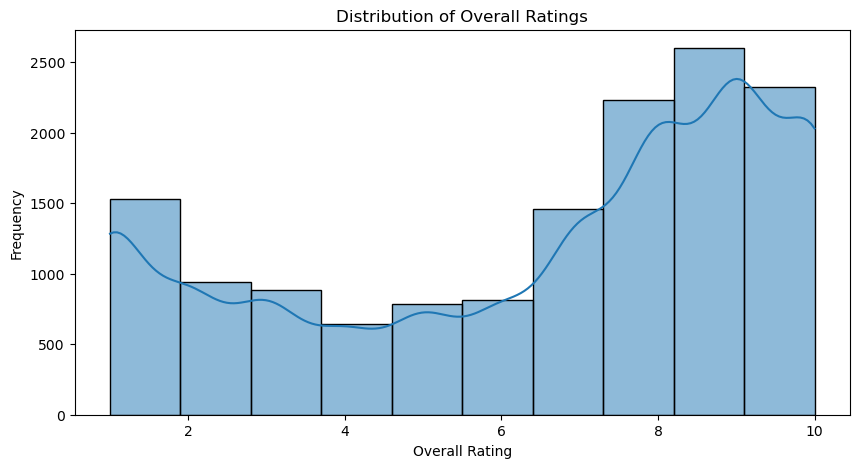

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='overall', bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

This graph shows the distribution of overall ratings using histogram, the dataset has a positive sentiment bias, as lower ratings are much less common.

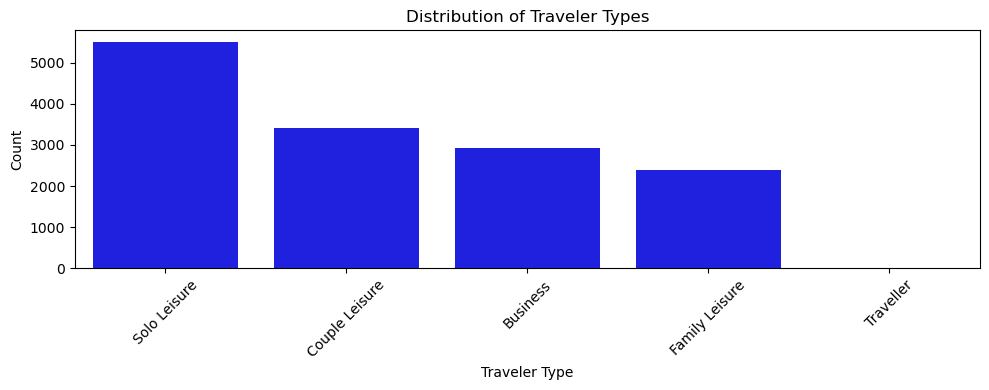

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='traveller_type', order=df['traveller_type'].value_counts().index, color='blue')
plt.title('Distribution of Traveler Types')
plt.xlabel('Traveler Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Barplot shows the distribution of traveller type, interpreting whuch type of travellers and their count.

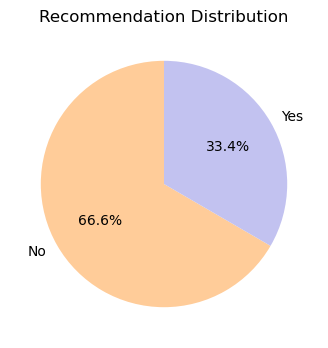

In [32]:
plt.figure(figsize=(10,4))
df['recommended'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#ffcc99','#c2c2f0'])
plt.title('Recommendation Distribution')
plt.ylabel('')
plt.show()

 Pie chart shows the distribution of airline recommendation which interprets that almost 66% of the customers did not recommend the airline.

2. Bivarent Analysis

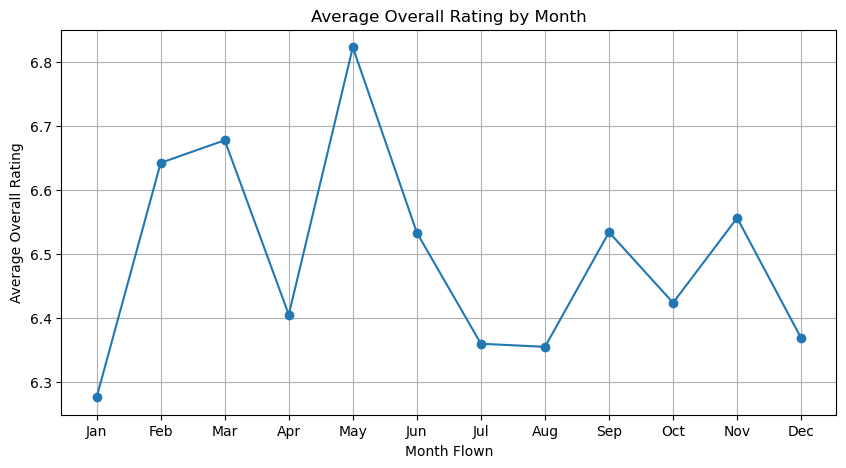

In [34]:
monthly_avg = df.groupby('month_flown')['overall'].mean().sort_index()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average Overall Rating by Month')
plt.xlabel('Month Flown')
plt.ylabel('Average Overall Rating')
plt.xticks(ticks=range(1,13), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True)
plt.show()

line plot shows the average overall rating by month, analysing the seasonal trends in customer satisfaction. May shows the highest average rating while
January has the lowest rating.

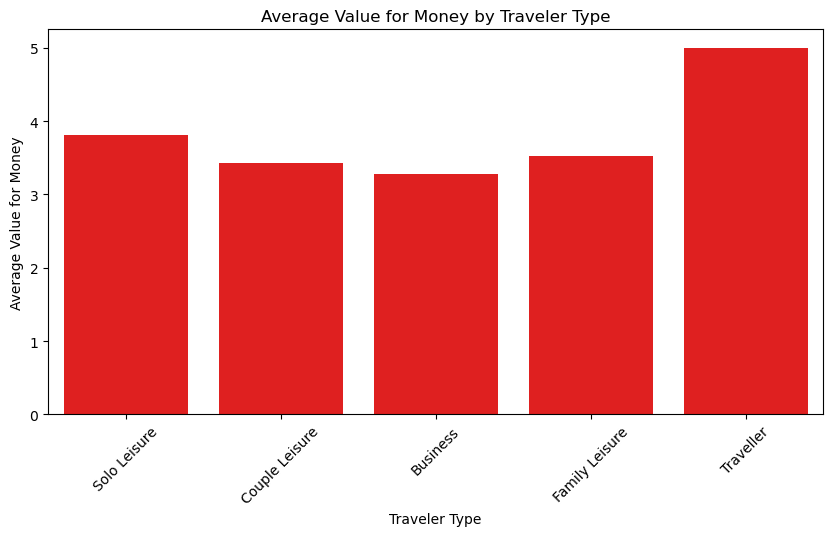

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='traveller_type', y='value_for_money', estimator='mean', ci=None, color = 'red')
plt.title('Average Value for Money by Traveler Type')
plt.xlabel('Traveler Type')
plt.ylabel('Average Value for Money')
plt.xticks(rotation=45)
plt.show()

Bar plot displays the average value for money rating by traveller type, interpreting that the "Traveller" 
group has the highest value for money while "Business" having lowest.

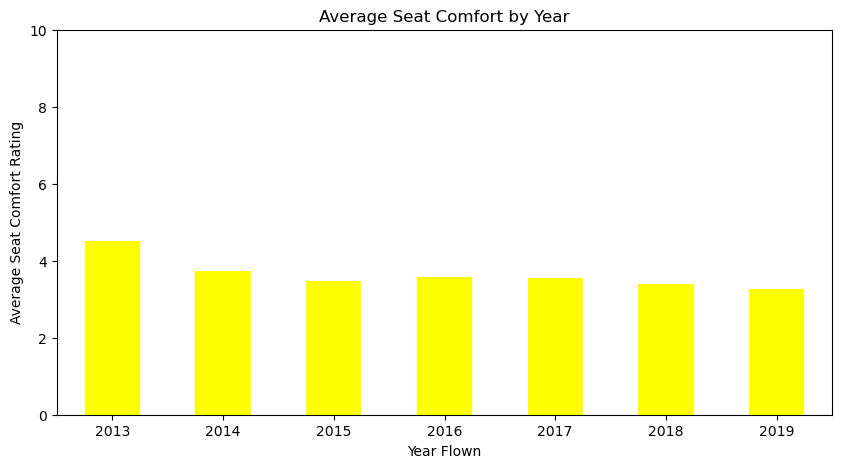

In [38]:
yearly_comfort = df.groupby('year_flown')['seat_comfort'].mean()
plt.figure(figsize=(10,5))
yearly_comfort.plot(kind='bar', color='yellow')
plt.title('Average Seat Comfort by Year')
plt.xlabel('Year Flown')
plt.ylabel('Average Seat Comfort Rating')
plt.xticks(rotation=0)
plt.ylim(0, 10)  # Adjust if your scale differs
plt.show()

Bar chart visualizes the average seat comfort rating by year, highlighting how customer comfort perception has changed over time.

3. Multivariate Analysis

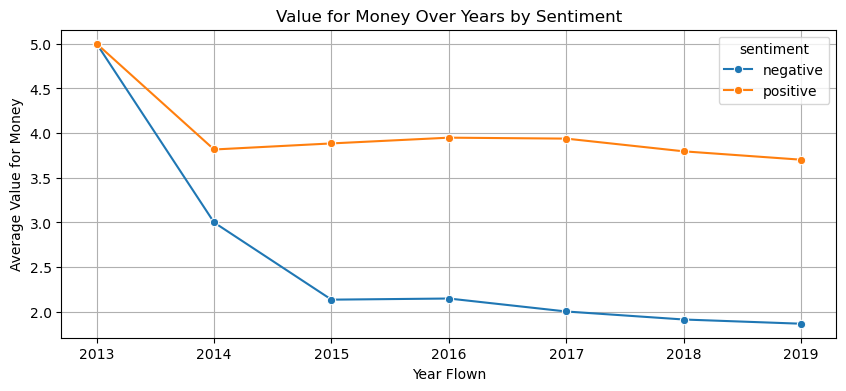

In [39]:
value_sentiment = df.groupby(['year_flown', 'sentiment'])['value_for_money'].mean().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=value_sentiment, x='year_flown', y='value_for_money', hue='sentiment', marker='o')
plt.title('Value for Money Over Years by Sentiment')
plt.xlabel('Year Flown')
plt.ylabel('Average Value for Money')
plt.grid(True)
plt.show()

line plot represents the value for money over year by sentiment, interpreting how the sentiments of the customers (Positive or Negative) has changed over years. The plot shows that the positive feedback has
been constant since 2014 while negative feedbacks dropped in 2014.

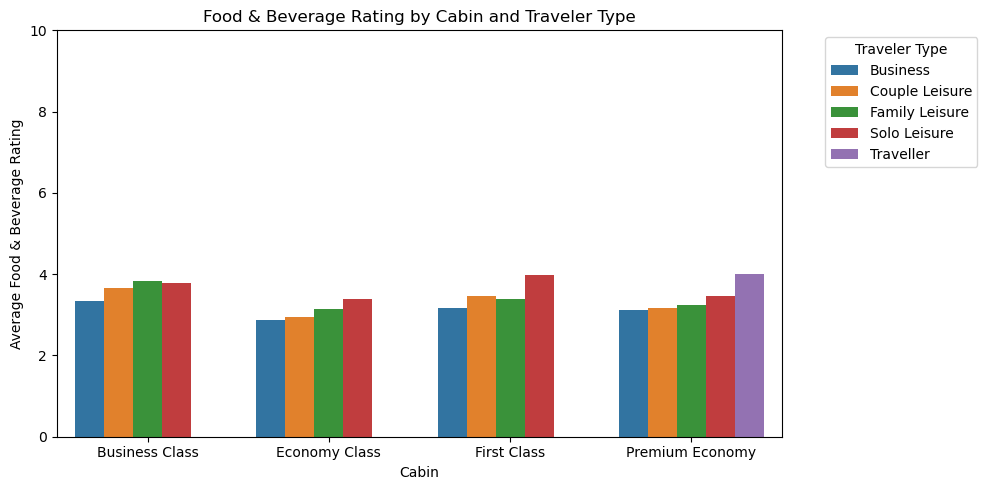

In [41]:
avg_fb = df.groupby(['cabin', 'traveller_type'])['food_bev'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=avg_fb, x='cabin', y='food_bev', hue='traveller_type')
plt.title('Food & Beverage Rating by Cabin and Traveler Type')
plt.xlabel('Cabin')
plt.ylabel('Average Food & Beverage Rating')
plt.ylim(0, 10)  # assuming 0–10 scale
plt.legend(title='Traveler Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Grouped bar chart shows the average food & beverage rating across different cabin classes and traveler types, offering insights into how these two factors influence passenger satisfaction with in-flight food and drinks.

**Correlation Analysis**

In [42]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,positive,4,2019
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,no,positive,4,2019
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,yes,positive,4,2019
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,no,negative,2,2019
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,no,positive,3,2019


In [43]:
int_columns = df.select_dtypes(include = 'int')

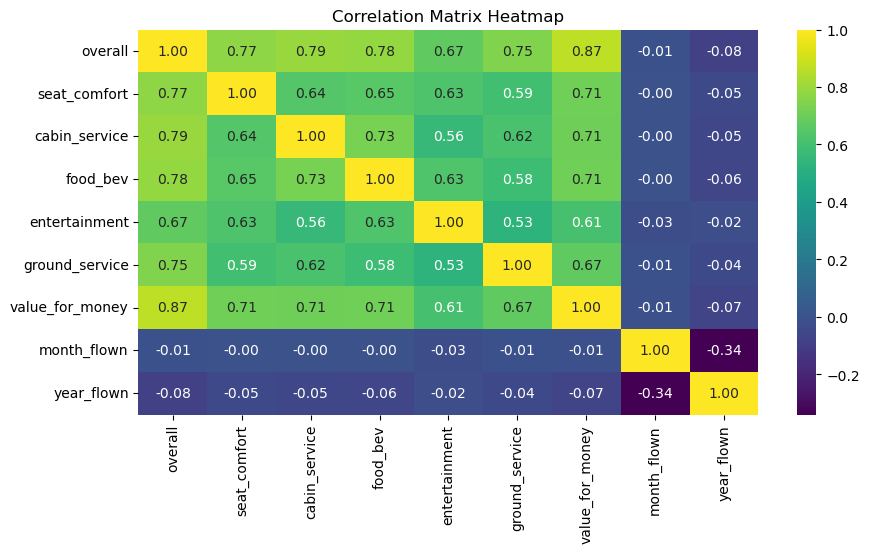

In [48]:
plt.figure(figsize=(10,5))
correlation_matrix = int_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation heatmap shows that the overall rating is most strongly correlated with value for money (0.87), followed by cabin service (0.79) and food & beverages (0.78), suggesting these are key drivers of customer satisfaction. Most service-related features have positive correlations with each other. In contrast, month_flown and year_flown show weak or slightly negative correlations with all other variables, indicating that the time of travel doesn't significantly influence customer satisfaction or service ratings.


**Outlier Detection**

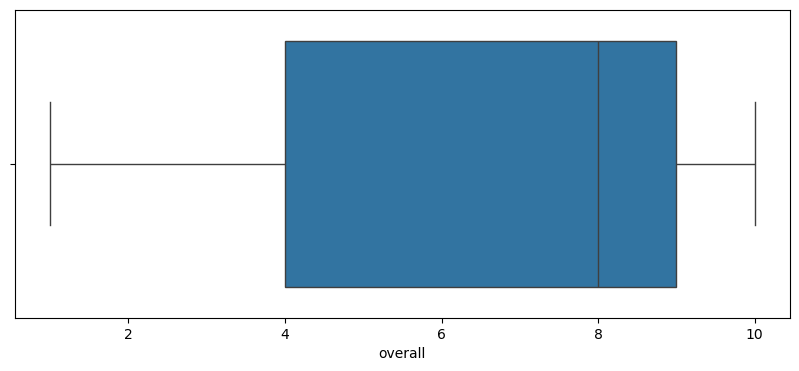

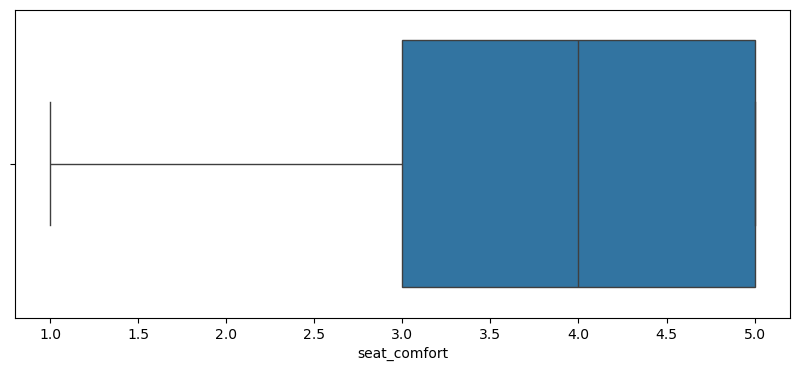

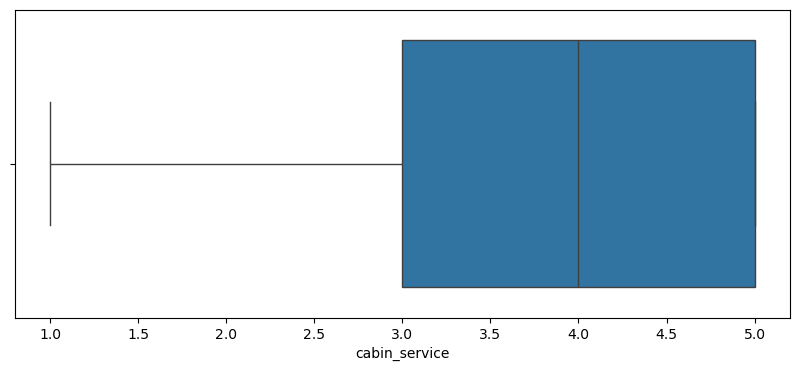

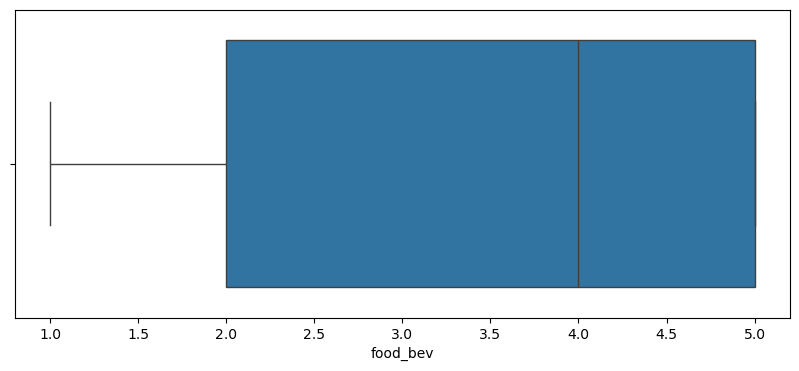

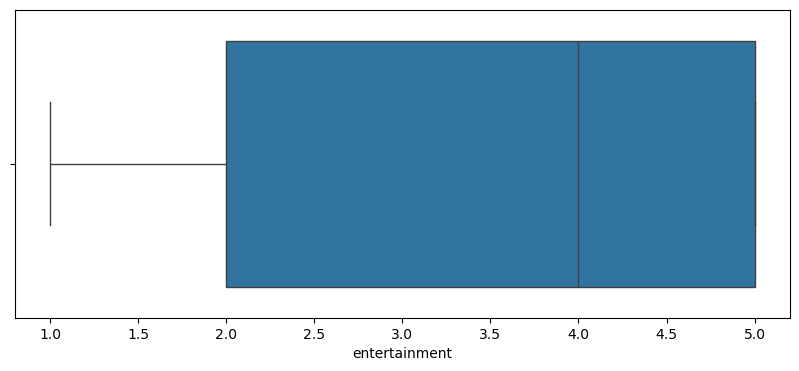

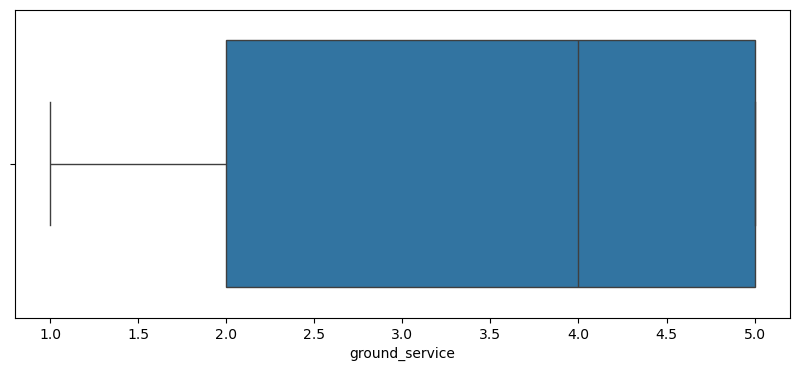

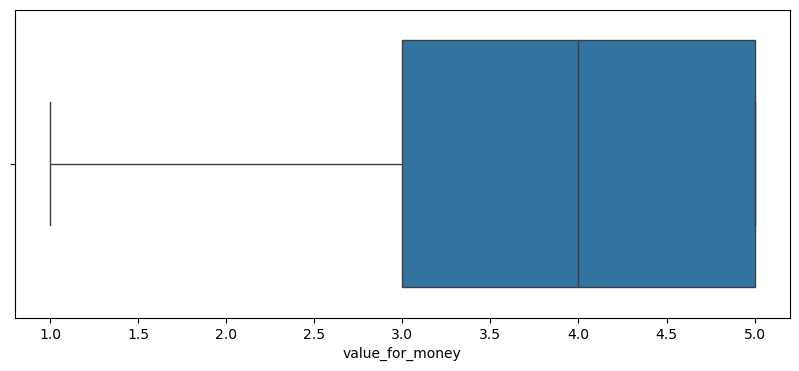

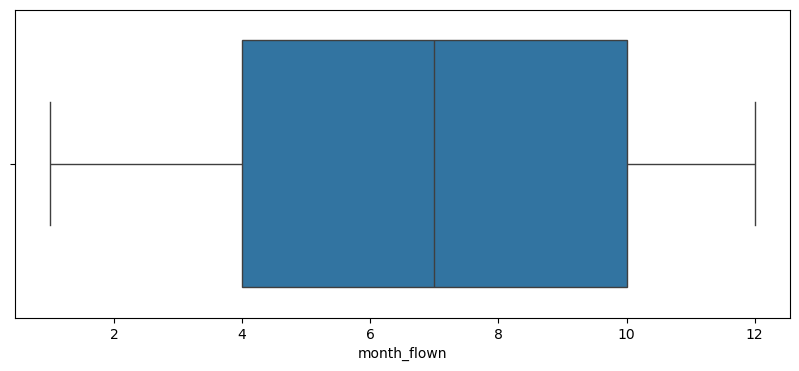

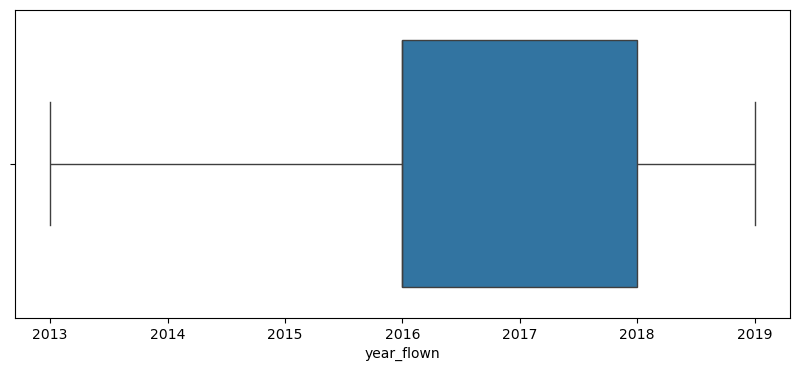

In [49]:
for i in int_columns.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = int_columns[i])
    plt.show()

No outliers in the dataset so we can do encoding

In [50]:

df.shape

(14215, 14)

**One Hot Encoding**

In [51]:
df.head()

,overall,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,month_flown,year_flown
0,10,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,positive,4,2019
1,2,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,no,positive,4,2019
2,6,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,yes,positive,4,2019
3,1,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,no,negative,2,2019
4,2,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,no,positive,3,2019


In [52]:
df = pd.get_dummies(df, columns=['sentiment'], drop_first=True)

In [53]:
df = pd.get_dummies(df, columns=['traveller_type', 'cabin'], drop_first=True)

In [54]:
df.head()

,overall,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,month_flown,year_flown,sentiment_positive,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,10,2019-04-01,4,5,5,5,5,5,yes,4,2019,True,False,False,True,False,True,False,False
1,2,2019-04-01,3,3,2,3,1,2,no,4,2019,True,False,False,True,False,True,False,False
2,6,2019-04-01,2,3,3,3,3,3,yes,4,2019,True,False,False,True,False,True,False,False
3,1,2019-02-01,1,1,1,1,1,1,no,2,2019,False,False,False,True,False,True,False,False
4,2,2019-03-01,1,3,2,2,1,1,no,3,2019,True,False,False,True,False,True,False,False


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   overall                        14215 non-null  int32         
 1   date_flown                     14215 non-null  datetime64[ns]
 2   seat_comfort                   14215 non-null  int32         
 3   cabin_service                  14215 non-null  int32         
 4   food_bev                       14215 non-null  int32         
 5   entertainment                  14215 non-null  int32         
 6   ground_service                 14215 non-null  int32         
 7   value_for_money                14215 non-null  int32         
 8   recommended                    14215 non-null  object        
 9   month_flown                    14215 non-null  int32         
 10  year_flown                     14215 non-null  int32         
 11  sentiment_posit

In [56]:
df.drop(['date_flown'], axis = 1, inplace = True)

**Model Prepration**

In [57]:
x = df.drop(['recommended'], axis = 1).values
y = df['recommended'].values

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

**Scaling**

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [60]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)


LogisticRegression()

**Predicting result**

In [62]:
y_pred = log.predict(x_test)
y_pred

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

In [63]:
y_test

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

**Checking accuracy**

In [64]:
print("Training Score: ", log.score(x_train, y_train)*100, "%")
print("Testing Score: ", log.score(x_test, y_test)*100, "%")

Training Score:  95.17587939698493 %
Testing Score:  95.02930832356388 %


**Confusion Metrics**

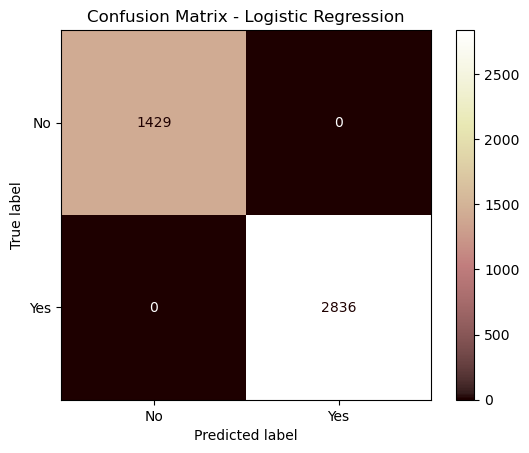

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = log.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

disp.plot(cmap='pink')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score (Set pos_label='yes' since your classes are strings)
precision = precision_score(y_test, y_pred, pos_label='yes')
recall = recall_score(y_test, y_pred, pos_label='yes')
f1 = f1_score(y_test, y_pred, pos_label='yes')

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")


Accuracy       : 1.00
Error Rate     : 0.00
Precision (Yes): 1.00
Recall (Yes)   : 1.00
F1 Score (Yes) : 1.00


In [73]:
print(accuracy)
print(error)
print(precision)
print(recall)
print(f1)

1.0
0.0
1.0
1.0
1.0


**Cross Validation**

In [74]:
from sklearn.model_selection import cross_val_score
print("Training",np.mean(cross_val_score(log,x_train,y_train)*100))
print("Testing",np.mean(cross_val_score(log,x_test,y_test)*100))

Training 95.1356783919598
Testing 99.41383352872217


**Decision Tree Classifier**

In [75]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)
print("The Predicted values are: ", dt_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(dt.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dt.score(x_test, y_test)*100,2), "%")

The Predicted values are:  ['yes' 'yes' 'yes' ... 'yes' 'yes' 'no']
The Actual values are:  ['yes' 'yes' 'no' ... 'yes' 'yes' 'no']
--------------------------------------------------------------------------------
Training Score:  99.99 %
Testing Score:  94.49 %


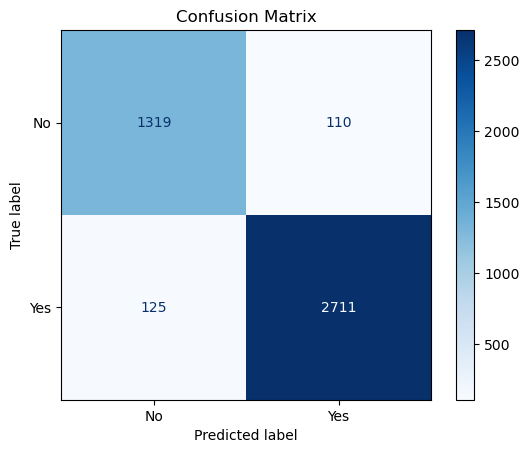

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, dt_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Set pos_label='yes' to correctly calculate scores for the 'yes' class
precision = precision_score(y_test, dt_pred, pos_label='yes')
recall = recall_score(y_test, dt_pred, pos_label='yes')
f1 = f1_score(y_test, dt_pred, pos_label='yes')

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")


Accuracy       : 0.94
Error Rate     : 0.06
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


**Random Forest Classifier**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
print("The Predicted values are: ", rf_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(rf.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rf.score(x_test, y_test)*100,2), "%")

The Predicted values are:  ['yes' 'yes' 'no' ... 'yes' 'yes' 'no']
The Actual values are:  ['yes' 'yes' 'no' ... 'yes' 'yes' 'no']
--------------------------------------------------------------------------------
Training Score:  99.99 %
Testing Score:  98.08 %


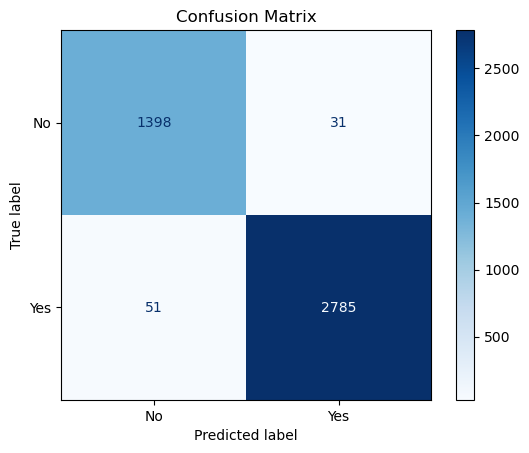

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, dt_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score
# Specify the actual positive class (e.g., 'yes')
precision = precision_score(y_test, dt_pred, pos_label='yes')
recall = recall_score(y_test, dt_pred, pos_label='yes')
f1 = f1_score(y_test, dt_pred, pos_label='yes')

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Accuracy       : 0.94
Error Rate     : 0.06
Precision (Yes): 0.96
Recall (Yes)   : 0.96
F1 Score (Yes) : 0.96


**KNN**

In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [85]:
knn_pred = knn.predict(x_test)
print("The Predicted values are: ", knn_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

The Predicted values are:  ['yes' 'yes' 'no' ... 'yes' 'yes' 'no']
The Actual values are:  ['yes' 'yes' 'no' ... 'yes' 'yes' 'no']
--------------------------------------------------------------------------------
Training Score:  95.35 %
Testing Score:  95.78 %


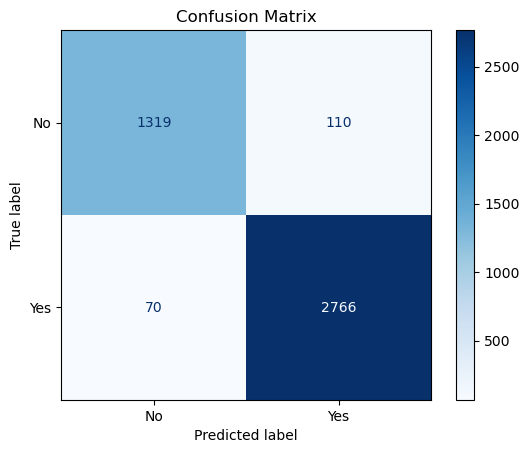

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, knn_pred)

# Error (1 - Accuracy)
error = 1 - accuracy

# Precision, Recall, F1 Score (specifying 'yes' as the positive class)
precision = precision_score(y_test, knn_pred, pos_label='yes')
recall = recall_score(y_test, knn_pred, pos_label='yes')
f1 = f1_score(y_test, knn_pred, pos_label='yes')

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Accuracy       : 0.96
Error Rate     : 0.04
Precision (Yes): 0.96
Recall (Yes)   : 0.98
F1 Score (Yes) : 0.97


**XGBoost**

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Predict on train and test sets
train_pred = rf_model.predict(x_train)
test_pred = rf_model.predict(x_test)

# Accuracy scores
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc * 100:.2f}%")

Training Accuracy: 99.99%
Testing Accuracy: 97.96%


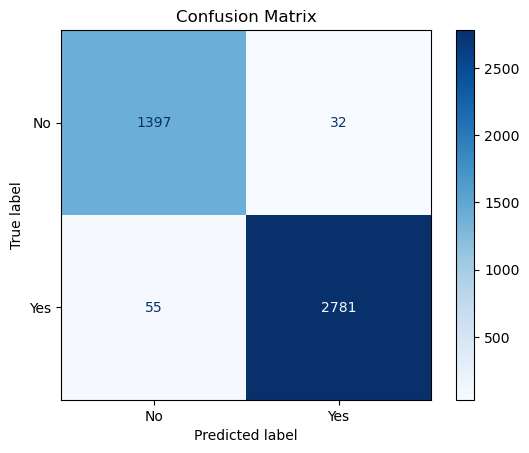

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, test_pred)

# Error Rate
error = 1 - accuracy

# Precision, Recall, F1 Score with correct positive label
precision = precision_score(y_test, test_pred, pos_label='yes')
recall = recall_score(y_test, test_pred, pos_label='yes')
f1 = f1_score(y_test, test_pred, pos_label='yes')

# Print all metrics
print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")


Accuracy       : 0.98
Error Rate     : 0.02
Precision (Yes): 0.99
Recall (Yes)   : 0.98
F1 Score (Yes) : 0.98


**All the accuracies**

In [96]:
overall_scores = pd.DataFrame({
    'Logistic Regression': (
        log.score(x_train, y_train)*100, 
        log.score(x_test, y_test)*100
    ),
    'Cross Validation': (
        np.mean(cross_val_score(log, x_train, y_train) * 100),
        np.mean(cross_val_score(log, x_test, y_test) * 100)
    ),
    'Decision Tree Classifier': (
        dt.score(x_train, y_train) * 100,
        dt.score(x_test, y_test) * 100
    ),
    'Random Forest Classifier': (
        rf.score(x_train, y_train) * 100,
        rf.score(x_test, y_test) * 100
    ),
    'KNN': (
        knn.score(x_train, y_train) * 100,
        knn.score(x_test, y_test) * 100
    )
}).T.rename(columns={0: 'Training Score', 1: 'Test Score'})


In [100]:
print(overall_scores)

                          Training Score  Test Score
Logistic Regression            95.175879  100.000000
Cross Validation               95.135678   99.413834
Decision Tree Classifier       99.989950   94.490035
Random Forest Classifier       99.989950   98.077374
KNN                            95.346734   95.779601


**Observation:**

1. Logistic Regression
   -Training Score: 95.18%, Test Score: 100% 
   - Performs very well on test data, possibly underfitting on training data slightly.

2. Cross Validation (Logistic Regression) 
   - Training CV Score: 95.14%, Test CV Score: 99.41%  
   - Shows consistent and reliable performance, indicating generalizability.

3. Decision Tree Classifier  
   - Training Score: 99.99%, Test Score: 94.49%  
   - Likely overfitting — perfect on training but lower generalization to test data.

4. Random Forest Classifier  
   - Training Score: 99.99%, Test Score: 98.08%  
   - Excellent performance; slightly overfit but generalizing better than the decision tree.

5. K-Nearest Neighbors (KNN)
   - Training Score: 95.35%, Test Score: 95.78%
   - Balanced and consistent performance, no major signs of overfitting or underfitting.



